In [14]:
import matplotlib.pyplot as plt
import numpy as np

#All from perspective of server IE upload is actually server send(client Recieve), download is server receive(client send)

upload_data = {
    'verizon-lte' : [],
    'tmobile-lte' : [],
    'ethernet' : [],
    '5g-rain' : [],
}

download_data = {
    'verizon-lte' : [],
    'tmobile-lte' : [],
    'ethernet' : [],
    '5g-rain' : [],
}

latency_data = {
    'verizon-lte' : [],
    'tmobile-lte' : [],
    'ethernet' : [],
    '5g-rain' : [],
}

for dataset in upload_data:
    with open('./{}/upload.txt'.format(dataset), 'r') as f:
        for line in f:
            upload_data[dataset].append(float(line))
    f.close()

for dataset in download_data:
    with open('./{}/download.txt'.format(dataset), 'r') as f:
        for line in f:
            download_data[dataset].append(float(line))    
        f.close()

for dataset in latency_data:
    with open('./{}/latency.txt'.format(dataset), 'r') as f:
        for line in f:
            latency_data[dataset].append(float(line))
    f.close()

In [18]:
def plotInHist(data, xlab, ylab, title, bins):
    kwargs = dict(histtype='step', stacked=True,
              alpha=0.6)

    plt.hist(data['verizon-lte'], **kwargs, color='blue', label='Verizon', bins=bins)
    plt.hist(data['tmobile-lte'], **kwargs, color='red', label='T-Mobile', bins=bins)
    plt.hist(data['ethernet'], **kwargs, color='orange', label='Ethernet', bins=bins);
    plt.hist(data['5g-rain'], **kwargs, color='magenta', label='AT&T 5G (rain)', bins=bins);
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

{'verizon-lte': [49.427, 53.513, 45.589, 56.186, 43.727, 50.173, 46.11, 56.894, 51.752, 54.462, 45.272, 52.158, 53.658, 51.713, 50.648, 60.684, 57.051, 53.904, 41.925, 42.912, 48.324, 45.277, 49.064, 55.18, 54.471, 40.23, 39.779, 43.202, 41.127, 53.102, 63.742, 49.971, 48.889, 60.322, 52.79], 'tmobile-lte': [65.583, 66.815, 69.227, 67.223, 67.21, 84.299, 61.224, 68.045, 179.943, 65.151, 71.292, 66.752, 78.857, 71.525, 66.23, 72.969, 70.966, 72.206, 64.986, 60.896, 69.369, 71.095, 69.984, 62.597, 81.496, 110.078, 62.309, 72.825, 62.1, 58.145, 61.901, 71.519, 66.641, 78.484, 68.152, 64.971, 70.058, 64.853, 68.055, 65.544, 69.039, 65.241, 70.999, 73.298, 71.229, 82.552, 75.54, 68.55, 65.892, 68.272, 67.126], 'ethernet': [24.095, 19.314, 19.94, 18.024, 20.005, 18.995, 18.749, 19.896, 20.833, 21.388, 17.163, 34.796, 22.455, 21.822, 20.216, 19.18, 20.168, 19.938, 19.338, 20.806, 17.681, 21.203, 19.97], '5g-rain': [68.601, 57.068, 81.329, 73.581, 76.827, 69.063, 163.788, 82.932, 52.13, 62.992

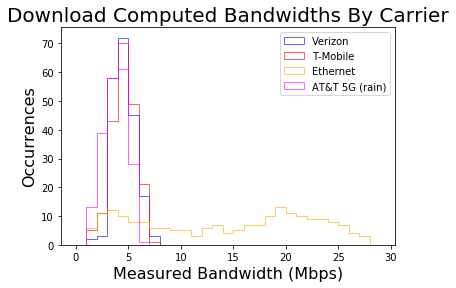

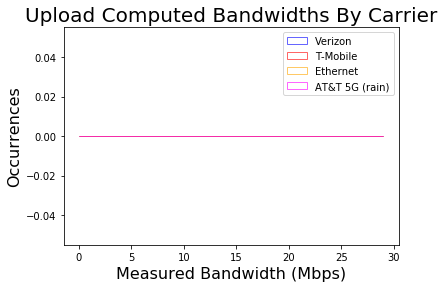

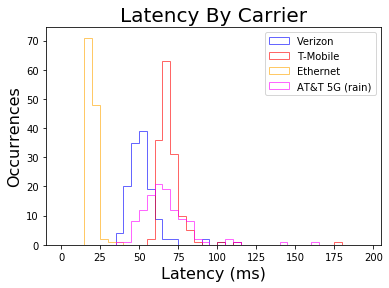

In [26]:
start = 25
end = 300
def truncate(data):
    return data[start:end]

for key, data in upload_data.items():
    upload_data[key] = truncate(data)    

for key, data in download_data.items():
    print(data)
    print(len(data))
    download_data[key] = truncate(data)
    
for key, data in latency_data.items():
    latency[key] = truncate(data)

bins1 = list(range(0, 30, 1)) #for download 
bins2 = list(range(0, 15, 1)) #for upload
bins3 = list(range(0, 200, 5)) #for latency


plotInHist(upload_data, 'Measured Bandwidth (Mbps)', 'Occurrences', 'Download Computed Bandwidths By Carrier', bins1)
plotInHist(download_data, 'Measured Bandwidth (Mbps)', 'Occurrences', 'Upload Computed Bandwidths By Carrier', bins1)
plotInHist(latency_data, 'Latency (ms)', 'Occurrences', 'Latency By Carrier', bins3)


In [4]:
#Grace Period Graphing for tmobile lte

points = 23

grace_1_upload = np.zeros((points, 3))
grace_1_download = np.zeros((points, 3))
grace_1_latency = np.zeros((points, 3))
grace_10_upload = np.zeros((points, 3))
grace_10_download = np.zeros((points, 3))
grace_10_latency = np.zeros((points, 3))
grace_50_upload = np.zeros((points, 3))
grace_50_download = np.zeros((points, 3))
grace_50_latency = np.zeros((points, 3))

with open('./tmobile-lte/grace-period-1/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-1/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_1_latency[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-10/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_10_latency[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement1/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][0] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement2/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][1] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/upload.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_upload[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/download.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_download[count][2] = float(line)
        count += 1
f.close()

with open('./tmobile-lte/grace-period-50/measurement3/latency.txt', 'r') as f:
    count = 0
    for line in f:
        if count >= points:
            break;
        grace_50_latency[count][2] = float(line)
        count += 1
f.close()

In [5]:
avg_grace_1_upload = np.mean(grace_1_upload, axis=1)
avg_grace_10_upload = np.mean(grace_10_upload, axis=1)
avg_grace_50_upload = np.mean(grace_50_upload, axis=1)

avg_grace_1_download = np.mean(grace_1_download, axis=1)
avg_grace_10_download = np.mean(grace_10_download, axis=1)
avg_grace_50_download = np.mean(grace_50_download, axis=1)

avg_grace_1_latency = np.mean(grace_1_latency, axis=1)
avg_grace_10_latency = np.mean(grace_10_latency, axis=1)
avg_grace_50_latency = np.mean(grace_50_latency, axis=1)

In [6]:
def plotLines(g1, g10, g50, xlab, ylab, title):

    plt.plot(range(g1.shape[0]), g1,color='blue', label='\u03BB = 1')
    plt.plot(range(g10.shape[0]), g10, color='red', label='\u03BB = 10')
    plt.plot(range(g50.shape[0]), g50, color='orange', label='\u03BB = 50');
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

In [7]:
def plotLinesExtra(g1, g1_o, g10, g10_o, g50, g50_o, xlab, ylab, title):

    plt.plot(range(g1.shape[0]), g1, color='blue', label='\u03BB = 1')
    plt.plot(range(g1_o.shape[0]), g1_o[:, 0], color='blue', alpha=0.2)
    plt.plot(range(g1_o.shape[0]), g1_o[:, 1], color='blue', alpha=0.2)
    plt.plot(range(g1_o.shape[0]), g1_o[:, 2], color='blue', alpha=0.2)
    plt.plot(range(g10.shape[0]), g10, color='red', label='\u03BB = 10')
    plt.plot(range(g10_o.shape[0]), g10_o[:, 0], color='red', alpha=0.2)
    plt.plot(range(g10_o.shape[0]), g10_o[:, 1], color='red', alpha=0.2)
    plt.plot(range(g10_o.shape[0]), g10_o[:, 2], color='red', alpha=0.2)
    plt.plot(range(g50.shape[0]), g50, color='orange', label='\u03BB = 50')
    plt.plot(range(g50_o.shape[0]), g50_o[:, 0], color='orange', alpha=0.2)
    plt.plot(range(g50_o.shape[0]), g50_o[:, 1], color='orange', alpha=0.2)
    plt.plot(range(g50_o.shape[0]), g50_o[:, 2], color='orange', alpha=0.2)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

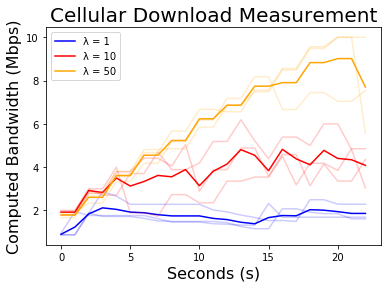

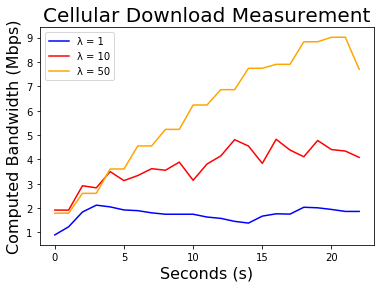

In [8]:
plotLinesExtra(avg_grace_1_upload, grace_1_upload, avg_grace_10_upload, grace_10_upload, avg_grace_50_upload, grace_50_upload, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Download Measurement')
plotLines(avg_grace_1_upload, avg_grace_10_upload, avg_grace_50_upload, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Download Measurement')

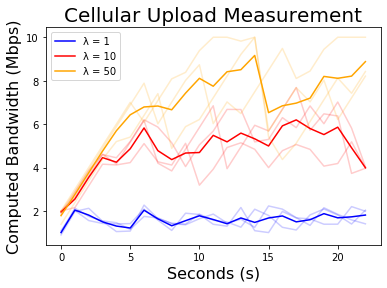

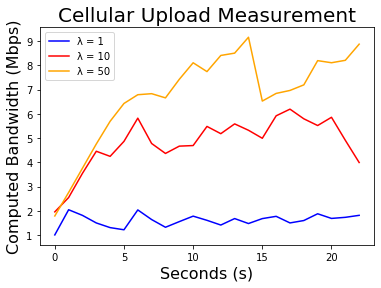

In [9]:
plotLinesExtra(avg_grace_1_download, grace_1_download, avg_grace_10_download, grace_10_download, avg_grace_50_download, grace_50_download, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Upload Measurement')
plotLines(avg_grace_1_download, avg_grace_10_download, avg_grace_50_download, 'Seconds (s)', 'Computed Bandwidth (Mbps)', 'Cellular Upload Measurement')

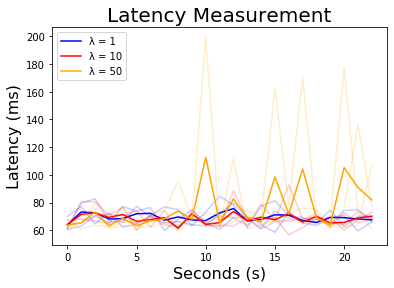

In [11]:
plotLinesExtra(avg_grace_1_latency, grace_1_latency, avg_grace_10_latency, grace_10_latency, avg_grace_50_latency, grace_50_latency, 'Seconds (s)', 'Latency (ms)', 'Latency Measurement')